<IPython.core.display.Javascript object>


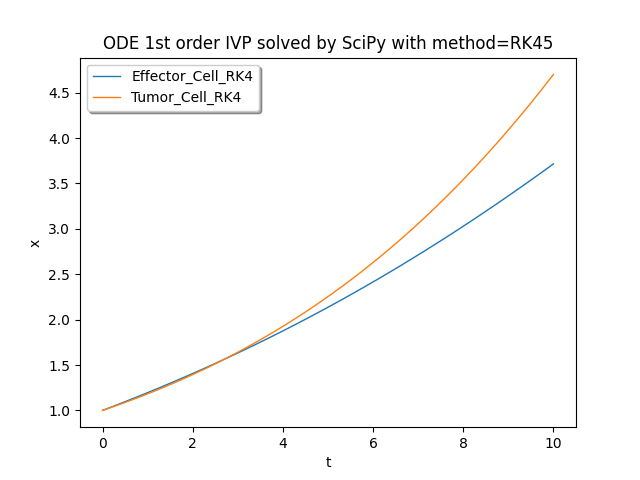

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.integrate import solve_ivp

#ode_fn = lambda t, x: np.sin(t) + 3. * np.cos(2. * t) - x

#an_sol = lambda t : (1./2.) * np.sin(t) - (1./2.) * np.cos(t) + \
                    #(3./5.) * np.cos(2.*t) + (6./5.) * np.sin(2.*t) - \
                    #(1./10.) * np.exp(-t)
#an_sol_x = lambda t : \
  #4.0* np.exp(4.0 * t) - 2.0 * np.exp(-t) 
#an_sol_y = lambda t : \
  #6.0 * np.exp(4. * t) - 2.0* np.exp(-  t) 

a =.18 
b = .002 
s = .13 
p = .1245 
g = .2019 
m = .003422
n = .01101 
d= 0.0412




def ode_fn( t,z):
    x,y=z
    return [s+p*x*y/(g+y) - m*x*y-d*x, a*y*(1-b*y)-n*x*y]    
   
t_begin=0.
t_end=10
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
z0 = [1.0, 1.0]
#args=(.13,.1245,.2019,.003422, 0.0412,.18 ,.002 ,.01101)
#an_sol_x = an_sol_x(t_space)
#an_sol_y = an_sol_y(t_space)
method = 'RK45' #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
num_sol = solve_ivp(lambda t, z:ode_fn(t,z), [t_begin, t_end],z0,t_eval=t_space,method=method, dense_output=True)

x_num_sol = num_sol.sol(t_space).T

plt.figure()
#plt.plot(t, an_sol_x, '--', linewidth=2, label='analytical')
#plt.plot(t, an_sol_y, '--', linewidth=2, label='analytical')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical_RK4')
plt.title('ODE 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.ylabel('x')
plt.legend(['Effector_Cell_RK4', 'Tumor_Cell_RK4','analytical'], shadow=True)
plt.show()